<a href="https://colab.research.google.com/github/SEKAR147/Demo-repo/blob/main/Neural_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural net classification with Pytorch

classification is a problem of predicting whether soenmthing is one thing or another( there can be multiple things as the optins)

## 1.  lets make classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles
x,y = make_circles(n_samples,
                   noise= 0.03,
                   random_state=42)


In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
print(f"first 5 samples of X: \n {x[:5]}")
print(f"first 5 samples of Y: \n {y[:5]}")

first 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of Y: 
 [1 1 1 1 0]


In [ ]:
# make a data frame
import pandas as pd
circles = pd.DataFrame({"x1": x[:,0],
                        "x2":x[:,1],
                        "labe;": y})
circles.head(7)

,x1,x2,labe;
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1


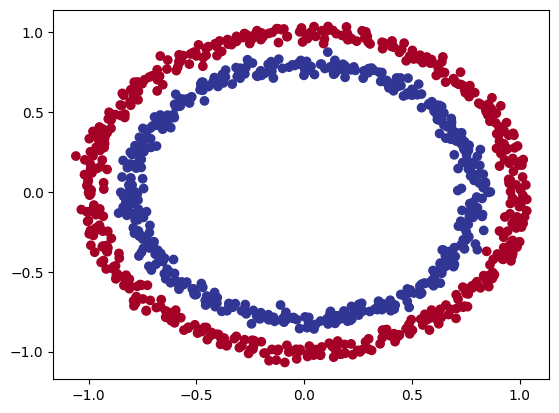

In [ ]:
# Visulize
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],
            y=x[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note: The data we're working with is often referred to as a toy data set , a dataset that is small enough to experimental but still sizeable to practice the fundamentals

### 1.1 Check input and ouput shapes

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# view the 1st example of features and labels
x_sample = x[0]
y_sample = y[0]

print(f"values for one sample of x:{x_sample} and the same for y:{y_sample} ")
print(f"shapes for one sample of x:{x_sample.shape} and the same for y:{y_sample.shape} ")

values for one sample of x:[0.75424625 0.23148074] and the same for y:1 
shapes for one sample of x:(2,) and the same for y:() 


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch

In [ ]:
type(x)

numpy.ndarray

In [ ]:
# Turn data into tensors
x= torch.from_numpy(x).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

x[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(x) , x.dtype , y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

x_train , x_test , y_train ,y_test = train_test_split(x,
                                                      y,
                                                      test_size= 0.2,
                                                      random_state = 42)


In [ ]:
len(x_train), len(x_test), len(y_train) , len(y_test)

(800, 200, 800, 200)

In [ ]:
n_samples

1000

## 2.Building a Model

let's Build a model to classify our blue and red dots
To do so ,we want to:
1. Setup device agonistic code so our code will run on an accelerator(GPU) if there is one
2. constuct a model
3. define a loss function and optimizer
4. create a training and test loop

In [ ]:
# import Pytorch and nn
import torch
from torch import nn

# make device agnostic code|

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
x_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code , let's create model that:

1. subclass `nn.Module`(almost all models in pytorch subclass `nn.Module`)
2. create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. defines a `forward()` method that outlines the forward pass(or forward computation ) of the model
4. instatiate an instance of our model class and send it to the target `device`

In [ ]:
# 1. construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
      super().__init__()
      # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
      self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
      self.layer_2 = nn.Linear(in_features = 5 , out_features = 1)

  # 3. define a forward() method that outlines the forward pass
  def forward(self , x):
      return self.layer_2(self.layer_1(x))
# 4. Instanctiate an instance of our model class and send it to the target values
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# let's replicate the model above using nn.sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features = 2 , out_features = 5),
    nn.Linear(in_features = 5 , out_features = 1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
# make some predictions
with torch.inference_mode():
    untrained_pred = model_0(x_test.to(device))
print(f"Length of the predictions :{len(untrained_pred)}, shape:{untrained_pred.shape}")
print(f"Length of the test samples:{len(x_test)},shape:{x_test.shape}")
print(f"\n 1st 10 predictions:\n {untrained_pred[:10]}")
print(f"\n 1st 10 labels:\n {y_test[:10]}")

Length of the predictions :200, shape:torch.Size([200, 1])
Length of the test samples:200,shape:torch.Size([200, 2])

 1st 10 predictions:
 tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

 1st 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## 2.1 Setup loss function and Optimizer

Which loss function or optimizer should you use?

again... this is problem specific

for example you might want MAE or MSE (mean absoulte error or mean sqaured error).

for classification you might want binary cross entropy or categorical cross entropy (cross entropy).

As a reminder , the loss function measures how *wrong* your models predictions are.

and for optimizers, two of the most common and useful are SGD and adam , however
Pytorch has the many built-in functions options

* for the loss fucntion we're going to use `torch.nn.BECWLLogitsLoss()`, for more on what cross entropy.

In [ ]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
# calculate accuracy - out of 100 examples ,what % does our model get right?
def accuracy_fn(y_true , y_pred):
  correct = torch.eq(y_true ,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

### 3. train Model

To train our model , we're going to need to build a training loop with following steps:

`Forward pass` - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).

`Calculate the loss` - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).

`Zero gradients `- The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step `(optimizer.zero_grad())`.

`Perform backpropagation on the loss` - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).

`Step the optimizer` (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

### 3.1 going from raw logits --> prediction probalities -.P prediction labels

we can convert these **Logits** into **Prediction Probabilities** by passing them to some kind of activation function (e.g sigmoid for binary classification an softmax for multiclass classfication)

then we can convert our model's prediction to **Prediction labels** by either rounding them or taking the `argmax()`

In [ ]:
# view the 1st 5 outputs of the foerward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(x_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# use the Sigmoid function  on our model logits to turn them into prediction
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

For our prediction probability values, we need to perform a range_style rounding on them:
* `y_pred_probs` >= 0.5 , y=1 (class = 1)
* `y_pred_probs` < 0.5 , y=0 (class = 0)


In [ ]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_preds_lables = torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))

# check for Equality
print(torch.eq(y_preds.squeeze(), y_preds_lables.squeeze()))

# get rid of extra dimension

y_preds.squeeze()


tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

### 3.2 Buiilding a Training and testing loop

In [ ]:
import torch
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the no of epochs
epochs = 100


# put data to target device
x_train , y_train = x_train.to(device), y_train.to(device)
x_test , y_test = x_test.to(device) , y_test.to(device)

# building training and evaluation loop
for epoch in range(epochs):
  ### training
  model_0.train()
  # 1. Forward pass

  y_logits = model_0(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss / Accuracy
  loss = loss_fn(y_logits,
                 y_train)

  acc= accuracy_fn(y_true=y_train,
                   y_pred=y_pred)

  # Optimzer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. optimizer step(gradient descent)
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    # 1.Forward pass
    test_logits = model_0(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate the loss /acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

    # print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch:{epoch} | Loss:{loss:.5f} , Acc:{acc:.2f} | Test Loss:{test_loss:.5f}, Test acc: {test_acc:.2f} %")





Epoch:0 | Loss:0.69796 , Acc:51.88 | Test Loss:0.69440, Test acc: 58.00 %
Epoch:10 | Loss:0.69590 , Acc:51.25 | Test Loss:0.69305, Test acc: 53.00 %
Epoch:20 | Loss:0.69490 , Acc:51.62 | Test Loss:0.69254, Test acc: 49.50 %
Epoch:30 | Loss:0.69435 , Acc:51.12 | Test Loss:0.69236, Test acc: 49.50 %
Epoch:40 | Loss:0.69401 , Acc:50.88 | Test Loss:0.69232, Test acc: 51.00 %
Epoch:50 | Loss:0.69378 , Acc:50.25 | Test Loss:0.69234, Test acc: 50.00 %
Epoch:60 | Loss:0.69362 , Acc:50.00 | Test Loss:0.69239, Test acc: 51.50 %
Epoch:70 | Loss:0.69351 , Acc:50.25 | Test Loss:0.69246, Test acc: 51.00 %
Epoch:80 | Loss:0.69342 , Acc:49.88 | Test Loss:0.69254, Test acc: 50.00 %
Epoch:90 | Loss:0.69336 , Acc:49.88 | Test Loss:0.69262, Test acc: 53.00 %


## 4. Make predictions and evaluate the model

from the metrics it looks our model isn't learning anything

So to inspect it lets make some predictions and make them visual

To do so , we're going to import a function called `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn pytorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_fucntions.py already exists, skipping download")
else:
  print("Downoad helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions , plot_decision_boundary

helper_fucntions.py already exists, skipping download


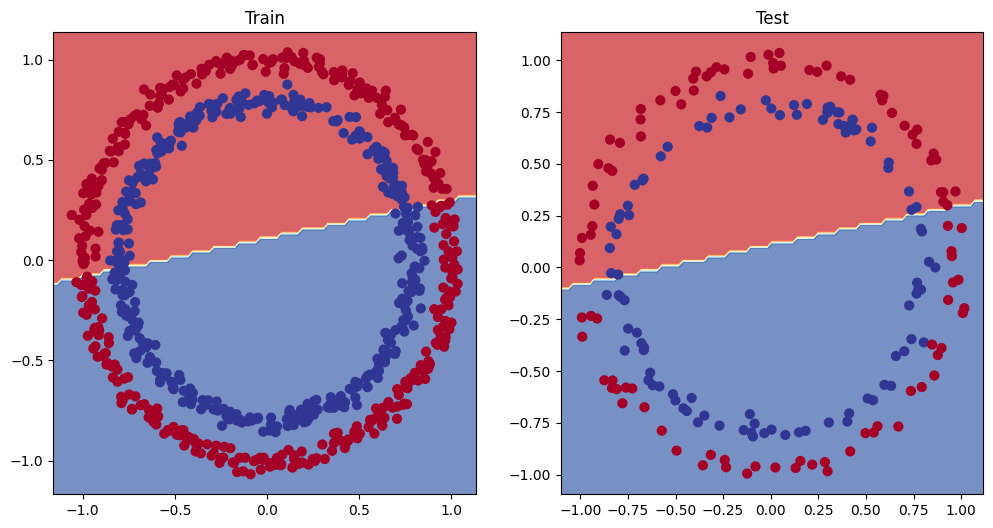

In [ ]:
# Plot decision boundary of the model
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0 , x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0 , x_test , y_test)

### 5.Improving a model (from a model prespective)

* Add more layers - give the model chances to learn about patterns in the data.
* Add more hidden layers units - go from 5 hidden units to 10 units
* Fit for Longer
* changing the activation functions
* changing the learning rate
* change the loss function

These options are all from a model's perspective because they deal with the model, rather than the data

and because these options are all values we (as machine learning engineers and data scientists) can change, they called **hyperparameters**

lets try to improve our model by:
* adding more hidden units : 5-> 10
* Increase the no of layers ; 2-> 3
* increase the no of epochs:100 -> 1000


In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2 , out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10 , out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10 , out_features = 1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))


model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0849, -0.2762],
                      [ 0.4610, -0.5187],
                      [-0.3271, -0.1947],
                      [-0.4220,  0.0507],
                      [-0.7016,  0.6600]])),
             ('0.bias', tensor([-0.6060,  0.5246,  0.1149, -0.2211,  0.4275])),
             ('1.weight',
              tensor([[ 0.0741,  0.2406,  0.0222, -0.1075,  0.1965]])),
             ('1.bias', tensor([-0.1888]))])

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0849, -0.2762],
                      [ 0.4610, -0.5187],
                      [-0.3271, -0.1947],
                      [-0.4220,  0.0507],
                      [-0.7016,  0.6600]])),
             ('0.bias', tensor([-0.6060,  0.5246,  0.1149, -0.2211,  0.4275])),
             ('1.weight',
              tensor([[ 0.0741,  0.2406,  0.0222, -0.1075,  0.1965]])),
             ('1.bias', tensor([-0.1888]))])

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [ ]:
# create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)



In [ ]:
# write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put the data on the target device
x_train , y_train = x_train.to(device), y_train.to(device)
x_test , y_test = x_test.to(device) , y_test.to(device)

for epoch in range(epochs):
  ### training
  ## 1. Forward pass
  y_logits = model_1(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss/accuaracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3.Optimzer zero grad
  optimizer.zero_grad()

  # 4.Loss backwars
  loss.backward()

  #. 5.Optimizer step
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.torch.inference_mode():
    #1.Forward pass
    test_logits = model_1(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    #2.Calculate Loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

    # print out what's happening every 10 epochs
    if epoch % 100 == 0:
      print(f"Epoch:{epoch} | Loss:{loss:.5f} ,Accuracy : {acc:.2f}% | Test Loss:{test_loss:.5f}, Test acc:{test_acc:.2f}%")


Epoch:0 | Loss:0.69396 ,Accuracy : 50.88% | Test Loss:0.69261, Test acc:51.00%
Epoch:100 | Loss:0.69305 ,Accuracy : 50.38% | Test Loss:0.69379, Test acc:48.00%
Epoch:200 | Loss:0.69299 ,Accuracy : 51.12% | Test Loss:0.69437, Test acc:46.00%
Epoch:300 | Loss:0.69298 ,Accuracy : 51.62% | Test Loss:0.69458, Test acc:45.00%
Epoch:400 | Loss:0.69298 ,Accuracy : 51.12% | Test Loss:0.69465, Test acc:46.00%
Epoch:500 | Loss:0.69298 ,Accuracy : 51.00% | Test Loss:0.69467, Test acc:46.00%
Epoch:600 | Loss:0.69298 ,Accuracy : 51.00% | Test Loss:0.69468, Test acc:46.00%
Epoch:700 | Loss:0.69298 ,Accuracy : 51.00% | Test Loss:0.69468, Test acc:46.00%
Epoch:800 | Loss:0.69298 ,Accuracy : 51.00% | Test Loss:0.69468, Test acc:46.00%
Epoch:900 | Loss:0.69298 ,Accuracy : 51.00% | Test Loss:0.69468, Test acc:46.00%


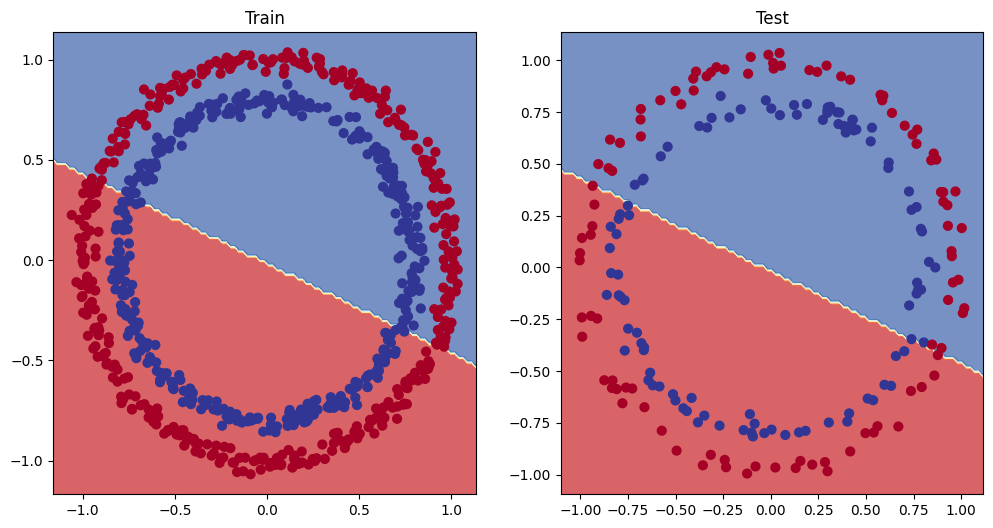

In [ ]:
# Plot decision boundary of the model
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1 , x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1 , x_test , y_test)

## 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test our a smaller problem

In [ ]:
# create some data (same as notebook 01)

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# create a data
x_regression = torch.arange(start , end , step).unsqueeze(dim=1)
y_regression = weight * x_regression + bias # Linear regression formula(without epsilon)

#Check the data
print(len(x_regression))
x_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# create train and test splits

train_split = int(0.8 * len(x_regression))
x_train_regression , y_train_regression = x_regression[:train_split] , y_regression[:train_split]
x_test_regression , y_test_regression = x_regression[train_split:] , y_regression[train_split:]

#check the length of each
len(x_train_regression) , len(x_test_regression), len(y_train_regression) , len(y_test_regression)

(80, 20, 80, 20)

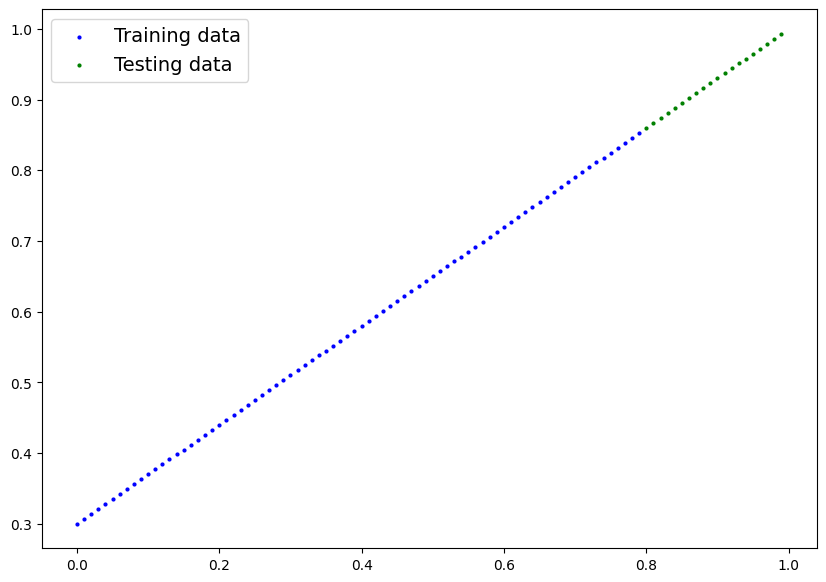

In [ ]:
plot_predictions(train_data = x_train_regression,
                 train_labels = y_train_regression,
                 test_data = x_test_regression,
                 test_labels = y_test_regression);

In [ ]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# same architeture as model_1 (but using nn.Sequential())

model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10 , out_features = 1)
    ).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
torch.manual_seed(42)

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr =0.1)

# Set the no of epochs
epoch = 1000

# put the data on the target device
x_train_regression , y_train_regression = x_train_regression.to(device) , y_train_regression.to(device)
x_test_regression , y_test_regression = x_test_regression.to(device) , y_test_regression.to(device)

# Training
for epoch in range(epoch):
  y_pred = model_2(x_train_regression)
  loss = loss_fn(y_pred , y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(x_test_regression)
    test_loss = loss_fn(test_pred , y_test_regression)

# print out
  if epoch % 100 == 0:
    print(f"Epoch:{epoch}  | Loss : {loss:.4f} , Acc:{acc:.2f}%  | Test Loss :{test_loss :.4f}, Test acc:{test_acc:.2f}%")


Epoch:0  | Loss : 0.7599 , Acc:51.00%  | Test Loss :0.5414, Test acc:46.00%
Epoch:100  | Loss : 0.0931 , Acc:51.00%  | Test Loss :0.0290, Test acc:46.00%
Epoch:200  | Loss : 0.0738 , Acc:51.00%  | Test Loss :0.0285, Test acc:46.00%
Epoch:300  | Loss : 0.0675 , Acc:51.00%  | Test Loss :0.0062, Test acc:46.00%
Epoch:400  | Loss : 0.0611 , Acc:51.00%  | Test Loss :0.0200, Test acc:46.00%
Epoch:500  | Loss : 0.0570 , Acc:51.00%  | Test Loss :0.0106, Test acc:46.00%
Epoch:600  | Loss : 0.0486 , Acc:51.00%  | Test Loss :0.0133, Test acc:46.00%
Epoch:700  | Loss : 0.0611 , Acc:51.00%  | Test Loss :0.0213, Test acc:46.00%
Epoch:800  | Loss : 0.0560 , Acc:51.00%  | Test Loss :0.0143, Test acc:46.00%
Epoch:900  | Loss : 0.0557 , Acc:51.00%  | Test Loss :0.0060, Test acc:46.00%


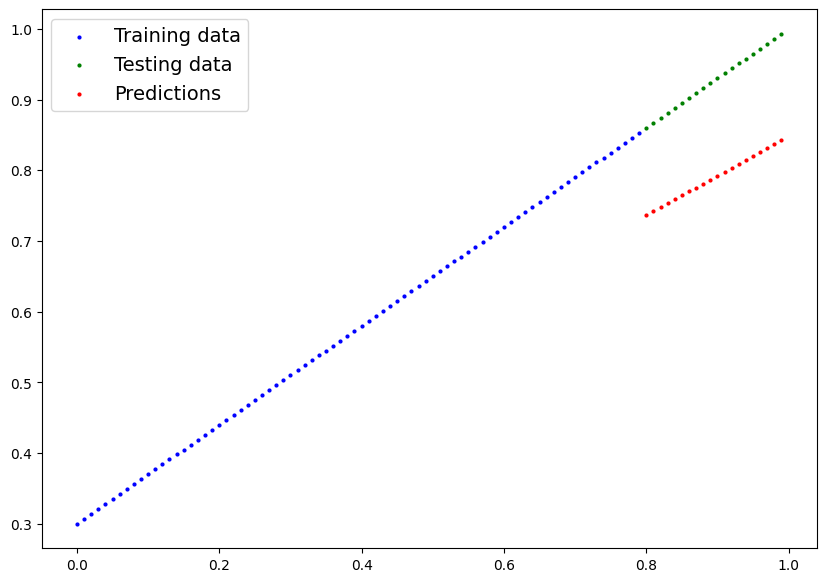

In [ ]:
# Turn on the Evaluation mode

model_2.eval()

#make a predictions(inference)
with torch.inference_mode():
  y_pred = model_2(x_test_regression)

# plot the predictions
plot_predictions(train_data = x_train_regression.cpu(),
                 train_labels = y_train_regression.cpu(),
                 test_data = x_test_regression.cpu(),
                 test_labels = y_test_regression.cpu(),
                 predictions = y_pred.cpu());


### 6. The Missing Piece: Non - linearity

"what patterns could you draw if you were given infinite amount of a straight and non - straight lines?"

or in machine learning terms , an infinte(but really it is finite) of linear and non - linear functions?

### 6.1 Recreating non-linear data(red - blue circles)


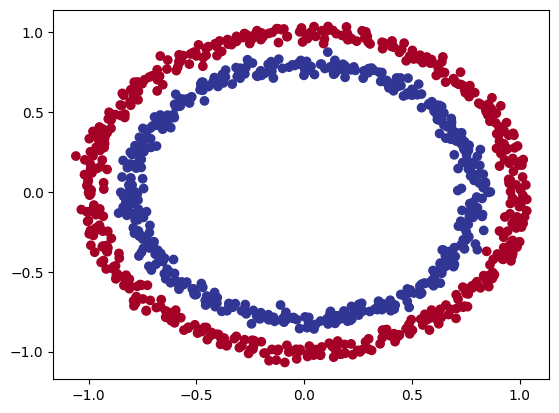

In [ ]:
# make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

x,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

plt.scatter(x[:,0], x[:,1], c=y, cmap= plt.cm.RdYlBu);

In [ ]:
# convert data to tensors and then to train and test splits

import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
x= torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

# split into train and test sets
x_train , x_test , y_train , y_test = train_test_split(x,
                                                       y,
                                                       test_size = 0.2,
                                                       random_state = 42)

x_train[:5] , y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

# 6.2 Building a model with non - linearity
 Linear- straight linear

 non-linear - non-straight lines



In [ ]:
# Build a model with non - linear activation functions

from torch import nn
import torch
# Define the device
device = "cuda" if torch.cuda.is_available() else "cpu"

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10 , out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10 , out_features =1 )
    self.relu = nn.ReLU() # relu is a non - linear activation function

  def forward(self , x):
    # wheer should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3




CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# setup loss and optimzer

loss_fn = nn.BCEWithLogitsLoss()
optimzer = torch.optim.SGD(model_3.parameters(),
                           lr = 0.1)

### 6.3 Training a Model with non-linearity


In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
x_train, y_train = x_train.to(device), y_train.to(device) # Move x_train and y_train to device
x_test, y_test = x_test.to(device), y_test.to(device)   # Move x_test and y_test to device

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(x_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69325, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69325, Test Accuracy: 50.00%
Epoch: 200 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69325, Test Accuracy: 50.00%
Epoch: 300 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69325, Test Accuracy: 50.00%
Epoch: 400 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69325, Test Accuracy: 50.00%
Epoch: 500 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69325, Test Accuracy: 50.00%
Epoch: 600 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69325, Test Accuracy: 50.00%
Epoch: 700 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69325, Test Accuracy: 50.00%
Epoch: 800 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69325, Test Accuracy: 50.00%
Epoch: 900 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69325, Test Accuracy: 50.00%


In [ ]:
## Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data on target device
x_train , y_train = x_train.to(device),y_train.to(device)
x_test , y_test = x_test.to(device) , y_test.to(device)


# Loop through data
epochs = 1000

for epoch in range(epochs):
  ###Training
  model_3.train

  # 1.forward loss
  y_logits = model_3(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2.calculate the loss
  loss = loss_fn(y_logits , y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  #5.step the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits , y_test)
    test_acc = accuracy_fn(y_true = y_test,
                            y_pred = test_pred)

    # print out what is happening
    if epoch % 100 == 0:
      print(f"Epoch:{epoch}  | Loss : {loss:.4f} , Acc:{acc:.2f}%  | Test Loss :{test_loss :.4f}, Test acc:{test_acc:.2f}%")


Epoch:0  | Loss : 0.6929 , Acc:50.00%  | Test Loss :0.6933, Test acc:50.00%
Epoch:100  | Loss : 0.6929 , Acc:50.00%  | Test Loss :0.6933, Test acc:50.00%
Epoch:200  | Loss : 0.6929 , Acc:50.00%  | Test Loss :0.6933, Test acc:50.00%
Epoch:300  | Loss : 0.6929 , Acc:50.00%  | Test Loss :0.6933, Test acc:50.00%
Epoch:400  | Loss : 0.6929 , Acc:50.00%  | Test Loss :0.6933, Test acc:50.00%
Epoch:500  | Loss : 0.6929 , Acc:50.00%  | Test Loss :0.6933, Test acc:50.00%
Epoch:600  | Loss : 0.6929 , Acc:50.00%  | Test Loss :0.6933, Test acc:50.00%
Epoch:700  | Loss : 0.6929 , Acc:50.00%  | Test Loss :0.6933, Test acc:50.00%
Epoch:800  | Loss : 0.6929 , Acc:50.00%  | Test Loss :0.6933, Test acc:50.00%
Epoch:900  | Loss : 0.6929 , Acc:50.00%  | Test Loss :0.6933, Test acc:50.00%


### 6.4 Evaluating a model trained with non - linear activation fucntions

In [ ]:
# makes predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(x_test))).squeeze()
y_preds[:10] , y_test[:10]

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

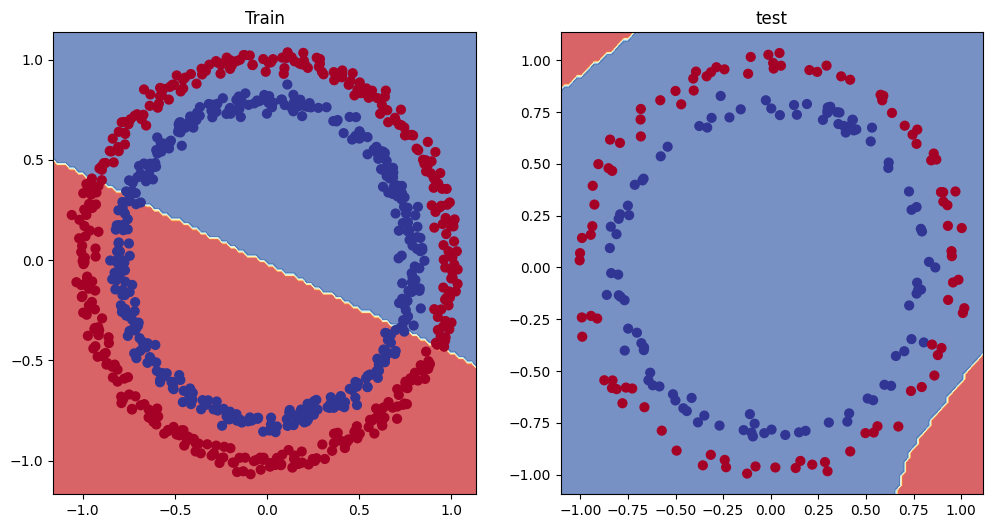

In [ ]:
# plot decision boundaries

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1 , x_train , y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3 , x_test , y_test)

### 7.replicating non-linear activation functions

Neural networks , rather than us telling the model what to learn,
we give it the tools to discover patterns in data and it tries to figure out the patterns on it's own

And these tools are linear and non - linear funcions

In [ ]:
# create a tensor
A = torch.arange(-10 , 10 ,.1 ,dtype= torch.float32)
A.dtype


torch.float32

In [ ]:
A

tensor([-1.0000e+01, -9.9000e+00, -9.8000e+00, -9.7000e+00, -9.6000e+00,
        -9.5000e+00, -9.4000e+00, -9.3000e+00, -9.2000e+00, -9.1000e+00,
        -9.0000e+00, -8.9000e+00, -8.8000e+00, -8.7000e+00, -8.6000e+00,
        -8.5000e+00, -8.4000e+00, -8.3000e+00, -8.2000e+00, -8.1000e+00,
        -8.0000e+00, -7.9000e+00, -7.8000e+00, -7.7000e+00, -7.6000e+00,
        -7.5000e+00, -7.4000e+00, -7.3000e+00, -7.2000e+00, -7.1000e+00,
        -7.0000e+00, -6.9000e+00, -6.8000e+00, -6.7000e+00, -6.6000e+00,
        -6.5000e+00, -6.4000e+00, -6.3000e+00, -6.2000e+00, -6.1000e+00,
        -6.0000e+00, -5.9000e+00, -5.8000e+00, -5.7000e+00, -5.6000e+00,
        -5.5000e+00, -5.4000e+00, -5.3000e+00, -5.2000e+00, -5.1000e+00,
        -5.0000e+00, -4.9000e+00, -4.8000e+00, -4.7000e+00, -4.6000e+00,
        -4.5000e+00, -4.4000e+00, -4.3000e+00, -4.2000e+00, -4.1000e+00,
        -4.0000e+00, -3.9000e+00, -3.8000e+00, -3.7000e+00, -3.6000e+00,
        -3.5000e+00, -3.4000e+00, -3.3000e+00, -3.2

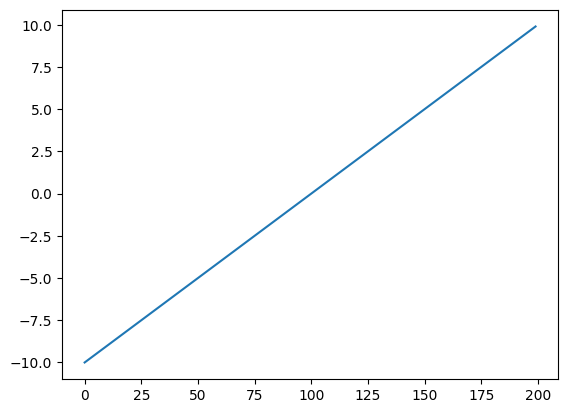

In [ ]:
 # Visulize the tensor
 plt.plot(A);

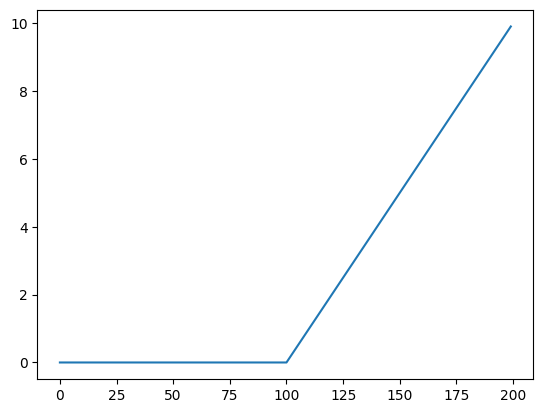

In [ ]:
plt.plot(torch.relu(A));

In [ ]:
def relu(x:torch.tensor):
  return torch.maximum(torch.tensor(0),x)
relu(A)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000,
        0.8000, 0.9000, 1.0000, 1.1000, 

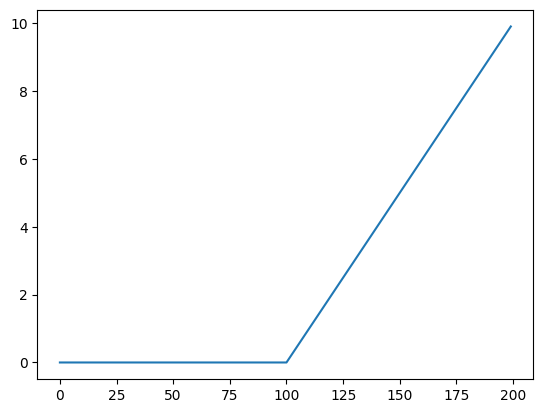

In [ ]:
plt.plot(relu(A));

In [ ]:
## Now let's do the same for sigmoid

def sigmoid(x):
  return 1/ (1+torch.exp(-x))

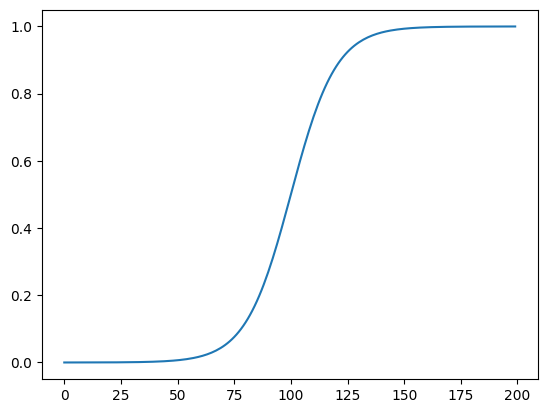

In [ ]:
plt.plot(torch.sigmoid(A));

### 8. Putting it all together with a multi - class classification problem

* Binary classifiction - one thing or another(cat vs dog , spam vs not spam , fraud or not fraud)
* Multi - class classifiction - more than one thing or another (cat vs dog vs chicken)

# 8.1 creating a toy data multi - class dataset

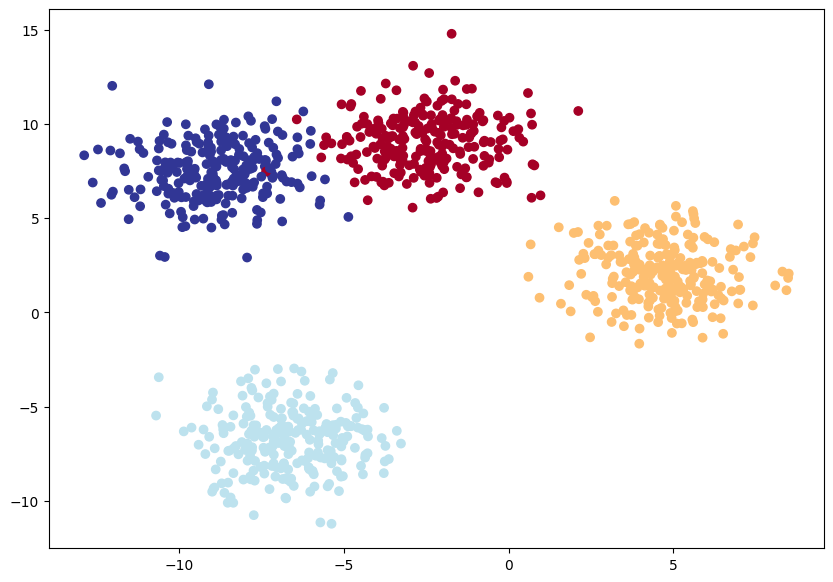

In [ ]:
# import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1.create multi - class data
x_blob , y_blob = make_blobs(n_samples = 1000,
                             n_features = NUM_FEATURES,
                             centers = NUM_CLASSES,
                             cluster_std = 1.5,
                             random_state = RANDOM_SEED)

# 2. Turn data into tensors
x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test sets
x_blob_train, x_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED
                                                                        )


# Plot data
plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],x_blob[:,1],c=y_blob , cmap=plt.cm.RdYlBu);

### 8.2 Building a multi-class classification model in Pytorch

In [ ]:
# Create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """ Intializes multi - class classification model.

  Args:
    input_features(int):Number of input features to the model
    output_features(int): Number of outputs features (number of output classes)
    hidden_units(int):Number of hidden units between layers , default 8

  Returns:

  Example:
  """
    # Fix: Call super().__init__() with correct arguments
    super().__init__()
    self.linear_layer_stack = nn.Sequential( # Fix: Correct typo 'Sequentionl' to 'Sequential'
        nn.Linear(in_features = input_features,out_features = hidden_units),
        nn.Linear(in_features = hidden_units , out_features = hidden_units),
        nn.Linear(in_features = hidden_units , out_features = output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

# create an instance of Blobmodel and send it to the target device
model_4 = BlobModel(input_features = 2,
                    output_features = 4,
                    hidden_units = 8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

# 8.3 Create a loss function and an optimizer for a multi class classification model



In [ ]:
# create a loss function for multi class classification
loss_fn = nn.CrossEntropyLoss()

# create an optimizer for multi class classification
optimzer = torch.optim.SGD(params = model_4.parameters(),
                           lr = 0.1) # learning rate is a hyperparamter you can change

# 8.4 Getting prediction probabalities for a multi class pytorch Model

In order to evaluate and train and test our model, we need to convert our's model's outputs(logits) to prediction probablities and then to prediction lables.

Logits(raw output of the model)  -> pred prob(use `torch.softmax`) -> pred labels (take the argmax of the prediction probabilities)

In [ ]:
# lets get some raw outputs of our model(logits)

model_4.eval()
with torch.inference_mode():
  y_logits = model_4(x_blob_test.to(device))
y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
y_blob_test.shape

torch.Size([200])

In [ ]:
# convert our model's logit outputs to prediction probabilites
y_preds_prob = torch.softmax(y_logits , dim=0)
print(y_logits[:5])
print(y_preds_prob[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0')
tensor([[0.0003, 0.0029, 0.0002, 0.0006],
        [0.0054, 0.0019, 0.0045, 0.0088],
        [0.0092, 0.0141, 0.0106, 0.0030],
        [0.0004, 0.0045, 0.0003, 0.0006],
        [0.0006, 0.0013, 0.0004, 0.0021]], device='cuda:0')


In [ ]:
y_preds_prob[0]

tensor([0.0003, 0.0029, 0.0002, 0.0006], device='cuda:0')

In [ ]:
torch.sum(y_preds_prob[0])

tensor(0.0040, device='cuda:0')

In [ ]:
torch.max(y_preds_prob)

tensor(0.0285, device='cuda:0')

In [ ]:
# convert our model's prediction probabilitoes to prediction labels
y_preds = torch.argmax(y_preds_prob , dim= 1)
y_preds

tensor([1, 3, 1, 1, 3, 3, 1, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1,
        1, 2, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1,
        3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 2, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 1, 3, 3, 3, 3, 2, 3, 1, 3, 3, 1, 1, 1, 3, 1, 2, 3, 3, 3, 1, 2,
        1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 2,
        1, 2, 3, 3, 3, 2, 1, 1, 3, 2, 3, 1, 3, 3, 2, 1, 2, 3, 3, 1, 3, 3, 1, 3,
        1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 1], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

## 8.5 Creating a training loop and testing loop for a multi - class Pytorch model.

In [ ]:
# fit the multi class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

# put data to the target device
x_blob_train, y_blob_train = x_blob_train.to(device) , y_blob_train.to(device)
x_blob_test , y_blob_test = x_blob_test.to(device) , y_blob_test.to(device)

#Loop through data
for epoch in range (epochs):
  ### Training
  model_4.train()

  y_logits = model_4(x_blob_train)
  y_pred = torch.softmax(y_logits , dim = 1).argmax(dim=1)

  loss = loss_fn(y_logits , y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(x_blob_test)
    test_preds = torch.softmax(test_logits , dim = 1).argmax(dim= 1)

    test_loss = loss_fn(test_logits , y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                           y_pred = test_preds)


  # print out  (This line should be indented)
  if epoch % 10 == 0:
    print(f"Epoch:{epoch} | Loss:{loss:.4f} , Acc:{acc :.2f}% | test loss:{test_loss:.4f}, test acc:{test_acc:.2f}%")

Epoch:0 | Loss:1.0432 , Acc:65.50% | test loss:1.0289, test acc:68.00%
Epoch:10 | Loss:1.0432 , Acc:65.50% | test loss:1.0289, test acc:68.00%
Epoch:20 | Loss:1.0432 , Acc:65.50% | test loss:1.0289, test acc:68.00%
Epoch:30 | Loss:1.0432 , Acc:65.50% | test loss:1.0289, test acc:68.00%
Epoch:40 | Loss:1.0432 , Acc:65.50% | test loss:1.0289, test acc:68.00%
Epoch:50 | Loss:1.0432 , Acc:65.50% | test loss:1.0289, test acc:68.00%
Epoch:60 | Loss:1.0432 , Acc:65.50% | test loss:1.0289, test acc:68.00%
Epoch:70 | Loss:1.0432 , Acc:65.50% | test loss:1.0289, test acc:68.00%
Epoch:80 | Loss:1.0432 , Acc:65.50% | test loss:1.0289, test acc:68.00%
Epoch:90 | Loss:1.0432 , Acc:65.50% | test loss:1.0289, test acc:68.00%


### 8.6 making and evaluating predictions with a pytorch multi class model

In [ ]:
### making predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(x_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')

In [ ]:
## go from logits--> predictions
y_pred_probs = torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951],
        [0.2788, 0.0088, 0.2893, 0.4232],
        [0.3246, 0.1261, 0.4545, 0.0948],
        [0.2229, 0.0443, 0.1867, 0.5461],
        [0.3447, 0.0368, 0.5269, 0.0917],
        [0.2145, 0.0510, 0.1752, 0.5593]], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [ ]:
y_preds = torch.argmax(y_pred_probs , dim=1)
y_preds[:10]

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

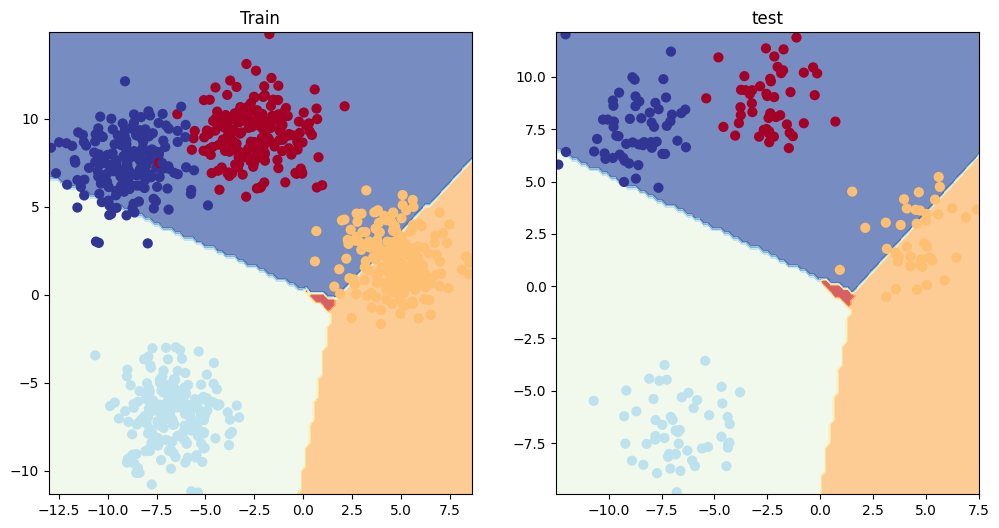

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4 ,x_blob_train , y_blob_train)
plt.subplot(1,2,2 )
plt.title("test")
plot_decision_boundary(model_4 , x_blob_test , y_blob_test)

In [ ]:
!pip install torchmetrics


In [ ]:
import torch
import torchmetrics
from torchmetrics import Accuracy

# setp metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)
# Assuming 4 classes based on the model and data
# Move the accuracy metric to the same device as the tensors

# Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)  # Fix: Use 'y_preds' instead of 't_preds' if that was intended

tensor(0.6800, device='cuda:0')